In [ ]:
import csv
import math

from typing import List

import numpy as np
from matplotlib import pyplot as plt
# import the ZOD DevKit
from zod import ZodFrames
from zod import ZodSequences
from zod import ZodDrives
from datetime import datetime, timezone

# import default constants
import zod.constants as constants
from zod.constants import Camera, Lidar, Anonymization, AnnotationProject

# import useful data classes
from zod.data_classes import LidarData

#for loading zod data
zod_dataset = "/datasets/zod"  # your local path to zod
version = "full"  # "mini" or "full"

# initialize ZodSequences
zod_drives = ZodDrives(dataset_root=zod_dataset, version=version)
zod_000002 = zod_drives['000002'] #getting a specific sequence

from utils_v2 import getAreaStats, getBoundingBoxImages
import json

zod_frames = ZodFrames(dataset_root=zod_dataset, version=version)
print(len(zod_frames))


Loading infos: 0it [00:00, ?it/s]

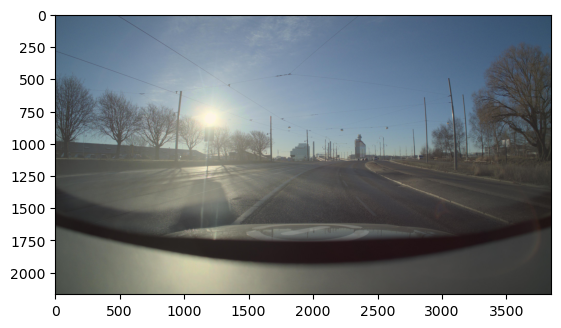

In [2]:
#accessing the keyframe by 
keyframe = zod_000002.info.get_key_camera_frame()
keyframe_image = keyframe.read()
plt.imshow(keyframe_image)
plt.show()

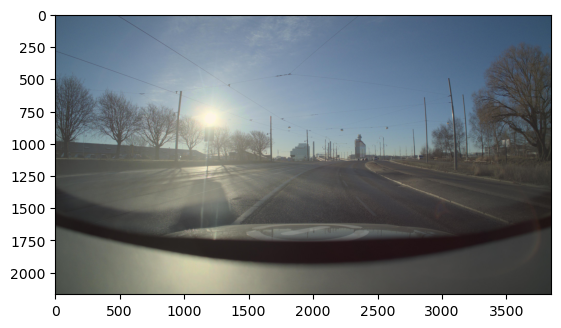

1677742578.457904


In [3]:
#accessing the keyframe by 
keyframe = zod_000002.info.get_key_camera_frame()
keyframe_image = keyframe.read()
plt.imshow(keyframe_image)
plt.show()

#find keyframe time by
print(zod_000002.info.keyframe_time.timestamp())

In [4]:

poses = zod_000002.oxts.origin_lat_lon
print(poses)

(57.71982437208687, 11.945402119714219)


In [5]:
print(zod_drives.get_all_ids())

{'000002', '000005', '000009', '000000', '000016', '000012', '000001', '000007', '000013', '000008', '000018', '000023', '000015', '000004', '000010', '000027', '000011', '000014', '000003', '000024', '000025', '000028', '000017', '000020', '000019', '000026', '000021', '000022', '000006'}


In [6]:
for item in zod_drives.get_all_ids():
    
    keyframe_location = zod_drives[item].oxts.origin_lat_lon
    print(keyframe_location)

(57.71982437208687, 11.945402119714219)
(57.702439879683205, 11.962708672007848)
(57.69425312695486, 11.950612791984849)
(48.94039506143484, 2.4242354022107246)
(57.71240783088643, 11.99046550959381)
(57.693750094970845, 11.973624086097098)
(48.82564341418568, 2.386092062695667)
(57.70249354177339, 11.962871049878213)
(57.698648942376444, 11.977172003484055)
(57.70044466014766, 11.951510611968455)
(57.70368366881829, 11.892275069115007)
(57.72345568949364, 12.005221327206854)
(57.70760986193178, 11.977823684514986)
(57.6850804719516, 11.901084105191702)
(57.68079892592739, 11.945448961450671)
(57.733613098002984, 12.073302085055621)
(57.689992959897566, 11.970605358786017)
(57.69896945300574, 11.97070516115153)
(57.71055806907655, 11.942820736588532)
(57.73184600788381, 11.983063999702601)
(57.7190290789224, 11.953960524124641)
(48.81780570764652, 2.353312314705813)
(57.72845751203801, 11.983818413088793)
(57.712830002668284, 11.995071203982192)
(48.93428558919414, 2.394241508623399)
(

In [16]:



data = {}


for item in zod_drives.get_all_ids():
    keyframe_location = zod_drives[item].oxts.origin_lat_lon
    lat = keyframe_location[0]
    long = keyframe_location[1]
    
    num_photos, unique_sequences, sequence_counts = getAreaStats([lat, long])
    
    
    print(f"Item: {item}, Number of photos: {num_photos}")
    print(f"Item: {item}, Number of Unique Sequences: {unique_sequences}")
    # print(sequence_counts)

    data[item] = {
    'num_photos': num_photos,
    'unique_sequences': unique_sequences,
    'sequence_counts': sequence_counts
    }


# # Save the dictionary to a JSON file
# with open('zod_drives.json', 'w') as jsonfile:
#     json.dump(data, jsonfile)

# print("All data saved to area_stats.json")
    
    



Item: 000016, Number of photos: 121
Item: 000016, Number of Unique Sequences: 15


KeyboardInterrupt: 

In [3]:
zod_frames = ZodFrames(dataset_root=zod_dataset, version=version)
print(len(zod_frames))






Loading infos: 0it [00:00, ?it/s]

100000


In [3]:
import json
import os
from tqdm import tqdm

# SPECIFY THE PARENT FOLDER HERE (AS A STRING)
parent_folder = "/home/bjangley/VPR/ZOD/zod_frames"  

# Ensure the output folder exists; create it if it doesn't
if not os.path.exists(parent_folder):
    print("Output Folder Does Not Exist")
    exit()  

# Iterate through each frame in zod_frames
for item in tqdm(zod_frames, desc="Processing frames", unit="frame", total=len(zod_frames)):
    
    lat = item.metadata.latitude
    long = item.metadata.longitude
    frame_id = item.metadata.frame_id
    # print(frame_id, lat, long)


    num_photos, unique_sequences, sequence_counts = getAreaStats([lat, long])

    # Prepare the data dictionary for this frame
    frame_data = {
        'num_photos': num_photos,
        'unique_sequences': unique_sequences,
        'sequence_counts': sequence_counts
        }

    # Construct the full file path
    filename = f"{frame_id}.json"
    filepath = os.path.join(parent_folder, filename)

    # Save the dictionary to a JSON file
    try:
        with open(filepath, 'w') as jsonfile:
            json.dump(frame_data, jsonfile, indent=4)
    except IOError as e:
        print(f"Error writing to file {filepath}: {e}. Skipping frame {frame_id}.")
        continue  # Skip to the next frame if file writing fails

print("\nAll frames saved to individual JSON files.")


Processing frames:   1%|▏         | 1497/100000 [8:45:31<576:19:59, 21.06s/frame] 


KeyError: 'data'

In [ ]:
def saveSequenceMetadata(folder_name, data, headers=header):
    metadata_endpoint = "https://graph.mapillary.com"

    if 'data' in data:
        # Create a directory to save images if it doesn't exist
        os.makedirs(str(folder_name), exist_ok=True)
        csv_file_path = str(folder_name)+'/metadata.csv'
        with open(csv_file_path, mode='w', newline='') as csv_file:
            fieldnames = ['id', 'thumb_2048_url', 'captured_at', 'sequence', 'lat', 'long', 'orientation','rotation','f', 'k1', 'k2', 'sfm_lat', 'sfm_long']
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for image in data['data']:
                # Fetch detailed information for each image
                url_image = metadata_endpoint + '/{}?fields=id,thumb_2048_url,captured_at,sequence,geometry,compass_angle,computed_rotation,camera_parameters,computed_geometry'.format(image['id'])
                response_image = requests.get(url_image, headers=headers)
                data_image = response_image.json()

                # Print image data (for debugging)
                #print(data_image)

                # Extract information
                img_id = data_image.get('id')
                img_url = data_image.get('thumb_2048_url')
                captured_at = data_image.get('captured_at')
                sequence = data_image.get('sequence')
                location = data_image.get('geometry')
                sfm_location = data_image.get('computed_geometry')
                orientation = data_image.get('compass_angle')
                rotation = data_image.get('computed_rotation')
                camera_params = data_image.get('camera_parameters')

                # Extract coordinates and orientation
                if location:
                    coordinates = location.get('coordinates')
                    print("coordinates",coordinates)
                    if coordinates:
                        longitude = coordinates[0]
                        latitude = coordinates[1]
                    else:
                        longitude = None
                        latitude = None
                else:
                    longitude = None
                    latitude = None

                #extract sfm location    
                if sfm_location:
                    print("sfm_location: ",sfm_location)
                    sfm_coordinates = sfm_location.get('coordinates')
                    if coordinates:
                        sfm_longitude = sfm_coordinates[0]
                        sfm_latitude = sfm_coordinates[1]
                    else:
                        sfm_longitude = None
                        sfm_latitude = None
                else:
                    sfm_longitude = None
                    sfm_latitude = None

                
                #extract intrinsics
                if camera_params:
                    focal_length = camera_params[0]
                    k1 = camera_params[1]
                    k2 = camera_params[2]
                else: 
                    focal_length = None
                    k1 = None
                    k2 = None


                

                # Save image metadata to CSV
                writer.writerow({
                    'id': img_id,
                    'thumb_2048_url': img_url,
                    'captured_at': captured_at,
                    'sequence': sequence,
                    'lat': latitude,
                    'long': longitude,
                    'orientation': orientation,
                    'rotation': rotation,
                    'f': focal_length,
                    'k1': k1,
                    'k2': k2,
                    'sfm_lat': sfm_latitude,
                    'sfm_long': sfm_longitude
                })

                # # Download the image and save it to the local directory
                # if img_url:
                #     img_response = requests.get(img_url)
                #     if img_response.status_code == 200:
                #         img_filename = f'{folder_name}/{img_id}.jpg'
                #         with open(img_filename, 'wb') as f:
                #             f.write(img_response.content)
                #         print(f'Downloaded {img_id}.jpg')
                #     else:
                #         print(f'Failed to download image {img_id}.jpg')
                # else:
                #     print(f'No URL found for image {img_id}')
    else:
        print(f"No images found for sequence.")

In [ ]:
import json
import os
from tqdm import tqdm

# SPECIFY THE PARENT FOLDER HERE (AS A STRING)
parent_folder = "/home/bjangley/VPR/mapillary_utils/zod"  

# Ensure the output folder exists; create it if it doesn't
if not os.path.exists(parent_folder):
    print("Output Folder Does Not Exist")
    exit()  

# Initialize a dictionary to store all frame data
all_frames_data = {}

# Iterate through each frame in zod_frames
for item in tqdm(zod_frames, desc="Processing frames", unit="frame", total=len(zod_frames)):
    
    lat = item.metadata.latitude
    long = item.metadata.longitude
    frame_id = item.metadata.frame_id
    country_code = item.metadata.country_code
    # print(frame_id, lat, long)

    # Prepare the data dictionary for this frame
    frame_data = {
        'lat':lat,
        'long':long,
        'country_code': country_code
        }
    
    all_frames_data[frame_id] = frame_data

# Specify the output JSON file path
output_file_path = os.path.join(parent_folder, "frames.json")
# Save the dictionary to a single JSON file
with open(output_file_path, "w") as json_file:
    json.dump(all_frames_data, json_file, indent=4)

print(f"\nAll frames saved to {output_file_path}.")




Processing drives:   0%|          | 0/29 [00:00<?, ?frame/s]


MissingFields: `SequenceMetadata.__init__()` missing required fields.
  Provided: []
  Missing: ['sequence_id', 'start_time', 'end_time', 'country_code', 'collection_car', 'longitude', 'latitude']
  Input JSON: "{\"sequence_id\": \"000000\", \"start_time\": \"2022-04-07T09:39:03.993869Z\", \"end_time\": \"2022-04-07T09:44:22.000016Z\", \"country_code\": \"FR\", \"collection_car\": \"uniform\", \"longitude\": 2.4242354022107246, \"latitude\": 48.94039506143484}"
  error: SequenceMetadata.__init__() missing 7 required positional arguments: 'sequence_id', 'start_time', 'end_time', 'country_code', 'collection_car', 'longitude', and 'latitude'

In [7]:



import json
import os
from tqdm import tqdm

# SPECIFY THE PARENT FOLDER HERE (AS A STRING)
parent_folder = "/home/bjangley/VPR/mapillary_utils/zod"  

# Ensure the output folder exists; create it if it doesn't
if not os.path.exists(parent_folder):
    print("Output Folder Does Not Exist")
    exit()  

# Initialize a dictionary to store all frame data
all_drives_data = {}

# Iterate through each frame in zod_frames
for item in tqdm(zod_drives.get_all_ids(), desc="Processing drives", unit="frame", total=len(zod_drives.get_all_ids())):
    
    # lat = item.metadata.latitude
    # long = item.metadata.longitude
    # frame_id = item.metadata.frame_id
    # country_code = item.metadata.country_code
    # # print(frame_id, lat, long)

    keyframe_location = zod_drives[item].oxts.origin_lat_lon
    country_code = zod_drives[item].metadata.country_code
    lat = keyframe_location[0]
    long = keyframe_location[1]

    # Prepare the data dictionary for this frame
    drive_data = {
        'lat':lat,
        'long':long,
        'country_code': country_code
        }
    
    all_drives_data[item] = drive_data

# Specify the output JSON file path
output_file_path = os.path.join(parent_folder, "drives.json")
# Save the dictionary to a single JSON file
with open(output_file_path, "w") as json_file:
    json.dump(all_drives_data, json_file, indent=4)

print(f"\nAll drives saved to {output_file_path}.")




Processing drives:   0%|          | 0/29 [00:00<?, ?frame/s]


MissingFields: `SequenceMetadata.__init__()` missing required fields.
  Provided: []
  Missing: ['sequence_id', 'start_time', 'end_time', 'country_code', 'collection_car', 'longitude', 'latitude']
  Input JSON: "{\"sequence_id\": \"000009\", \"start_time\": \"2023-03-02T07:59:37.000308Z\", \"end_time\": \"2023-03-02T08:03:52.000972Z\", \"country_code\": \"SE\", \"collection_car\": \"romeo\", \"longitude\": 11.950612791984849, \"latitude\": 57.69425312695486}"
  error: SequenceMetadata.__init__() missing 7 required positional arguments: 'sequence_id', 'start_time', 'end_time', 'country_code', 'collection_car', 'longitude', and 'latitude'